### BP Smoky Mountain Data Challenge

#### Author: Max Grossman (max.grossman@bp.com)

This notebook is intended to be an illustrative example of loading the realizations and gathers provided as part of the BP problem in the 2020 Smoky Mountain Data Challenge. This notebook relies on data files kept under the small_dataset/ folder provided with the data challenge. Please ensure that the folder is downloaded and unzipped, and placed in the same directory as this notebook.

This notebook requires that the numpy, matplotlib, pillow, and segpy packages be installed in the current Python environment. numpy, matplotlib, and pillow may be installed using pip or conda. segpy is only available from pip (i.e. 'pip install segpy').

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install segpy
%matplotlib inline
import math
import segpy
from segpy.reader import create_reader
from segpy.writer import write_segy
import os
import numpy as np
import matplotlib
import matplotlib.pyplot
from PIL import Image

In [2]:
"""
Utility for pulling information out of SEGY header and printing it for the user.
"""
def print_segy_info(filename):
    with open(filename, 'rb') as segy_in_file:
        segy_reader = create_reader(segy_in_file, endian='>')

        print("Filename:             ", segy_reader.filename)
        print("SEG Y revision:       ", segy_reader.revision)
        print("Number of traces:     ", segy_reader.num_traces())
        print("Data format:          ",
              segy_reader.data_sample_format_description)
        print("Dimensionality:       ", segy_reader.dimensionality)

        print()
        print("=== BEGIN TEXTUAL REEL HEADER ===")
        for line in segy_reader.textual_reel_header:
            if len(line.strip()) > 0:
                print(line)
        print("=== END TEXTUAL REEL HEADER ===")

In [3]:
"""
The provided files ending with a .stack.segy suffix store realizations of the subsurface
using some plausible (but not perfect) velocity model.

These realizations are 2D, with a depth (z) dimension of 400 and a horizontal (x) dimension
of 1058. This information can be seen in the SEGY header displayed below.
"""
print_segy_info('Desktop/BP HPC/small_dataset/small_dataset/img_1.stack.segy')


Filename:              Desktop/BP HPC/small_dataset/small_dataset/img_1.stack.segy
SEG Y revision:        SegYRevision.REVISION_0
Number of traces:      1058
Data format:           IBM 32 bit float
Dimensionality:        0

=== BEGIN TEXTUAL REEL HEADER ===
C01  BP syntheitc Date: 05/20/2019                                              
C02  image stack scenario with the following dimension                          
C03  axis  :         z         x         y                                      
C04  size  :       400      1058         1                                      
C05  origin:   0.00000   0.00000   0.00000                                      
C06  delta :  10.00000  10.00000  10.00000                                      
=== END TEXTUAL REEL HEADER ===


In [30]:
"""
Example of loading a single 2D realization from a single file into a 2D numpy array, with x
as your leading dimension and z as your innermost dimension. We know the x and z dimensions
(1058 and 400) from the SEGY header printed by the cell above.
"""
REALIZATIONS = 59
deviations = np.zeros((1058, 400))
means = np.zeros((1058, 400))
totals = np.zeros((1058, 400))
PATH = "Desktop/BP HPC/small_dataset/small_dataset"
                    

In [31]:
for file in os.listdir(PATH):
    if file.endswith(".stack.segy"):
        print(file)
        path = "Desktop/BP HPC/small_dataset/small_dataset/"+ file
        with open(path, 'rb') as segy_in_file:
            segy_reader = create_reader(segy_in_file, endian='>')
            for trace_index in segy_reader.trace_indexes():
                data = segy_reader.trace_samples(trace_index)
                for i in range(len(data)):
                    means[trace_index, i] += data[i]/REALIZATIONS #Collecting means, storing in array

img_1.stack.segy
img_10.stack.segy
img_11.stack.segy
img_12.stack.segy
img_13.stack.segy
img_14.stack.segy
img_15.stack.segy
img_16.stack.segy
img_17.stack.segy
img_18.stack.segy
img_19.stack.segy
img_2.stack.segy
img_20.stack.segy
img_21.stack.segy
img_22.stack.segy
img_23.stack.segy
img_24.stack.segy
img_25.stack.segy
img_26.stack.segy
img_27.stack.segy
img_28.stack.segy
img_29.stack.segy
img_3.stack.segy
img_30.stack.segy
img_31.stack.segy
img_32.stack.segy
img_33.stack.segy
img_34.stack.segy
img_35.stack.segy
img_36.stack.segy
img_37.stack.segy
img_38.stack.segy
img_39.stack.segy
img_4.stack.segy
img_40.stack.segy
img_41.stack.segy
img_42.stack.segy
img_43.stack.segy
img_44.stack.segy
img_45.stack.segy
img_46.stack.segy
img_47.stack.segy
img_48.stack.segy
img_49.stack.segy
img_5.stack.segy
img_50.stack.segy
img_51.stack.segy
img_52.stack.segy
img_53.stack.segy
img_54.stack.segy
img_55.stack.segy
img_56.stack.segy
img_57.stack.segy
img_58.stack.segy
img_59.stack.segy
img_6.stack.seg

In [32]:
#Probably better way than to rerun over files :( 
for file in os.listdir(PATH):
    if file.endswith(".stack.segy"):
        print(file)
        path = "Desktop/BP HPC/small_dataset/small_dataset/"+ file
        with open(path, 'rb') as segy_in_file:
            segy_reader = create_reader(segy_in_file, endian='>')
            for trace_index in segy_reader.trace_indexes():
                data = segy_reader.trace_samples(trace_index)
                for i in range(len(data)):
                    totals[trace_index, i] += (data[i] - means[trace_index, i]) ** 2


img_1.stack.segy
img_10.stack.segy
img_11.stack.segy
img_12.stack.segy
img_13.stack.segy
img_14.stack.segy
img_15.stack.segy
img_16.stack.segy
img_17.stack.segy
img_18.stack.segy
img_19.stack.segy
img_2.stack.segy
img_20.stack.segy
img_21.stack.segy
img_22.stack.segy
img_23.stack.segy
img_24.stack.segy
img_25.stack.segy
img_26.stack.segy
img_27.stack.segy
img_28.stack.segy
img_29.stack.segy
img_3.stack.segy
img_30.stack.segy
img_31.stack.segy
img_32.stack.segy
img_33.stack.segy
img_34.stack.segy
img_35.stack.segy
img_36.stack.segy
img_37.stack.segy
img_38.stack.segy
img_39.stack.segy
img_4.stack.segy
img_40.stack.segy
img_41.stack.segy
img_42.stack.segy
img_43.stack.segy
img_44.stack.segy
img_45.stack.segy
img_46.stack.segy
img_47.stack.segy
img_48.stack.segy
img_49.stack.segy
img_5.stack.segy
img_50.stack.segy
img_51.stack.segy
img_52.stack.segy
img_53.stack.segy
img_54.stack.segy
img_55.stack.segy
img_56.stack.segy
img_57.stack.segy
img_58.stack.segy
img_59.stack.segy
img_6.stack.seg

In [103]:
import math
#print("Deviations: Rows", len(deviations), "Cols ", len(deviations[0]))
#print("Cell - Mean: Rows", len(totals) , "Cols ", len(totals[0]))
#print("Mean: Rows", len(means), "Cols", len(means[0]))

for i in range(len(deviations)):
    for j in range(len(deviations[0])):

        deviations[i][j] = math.sqrt(totals[i][j]/REALIZATIONS)


In [34]:
deviations.min(), deviations.max()

(0.0, 8.215701398025244)

Max STD:  8.215701398025244


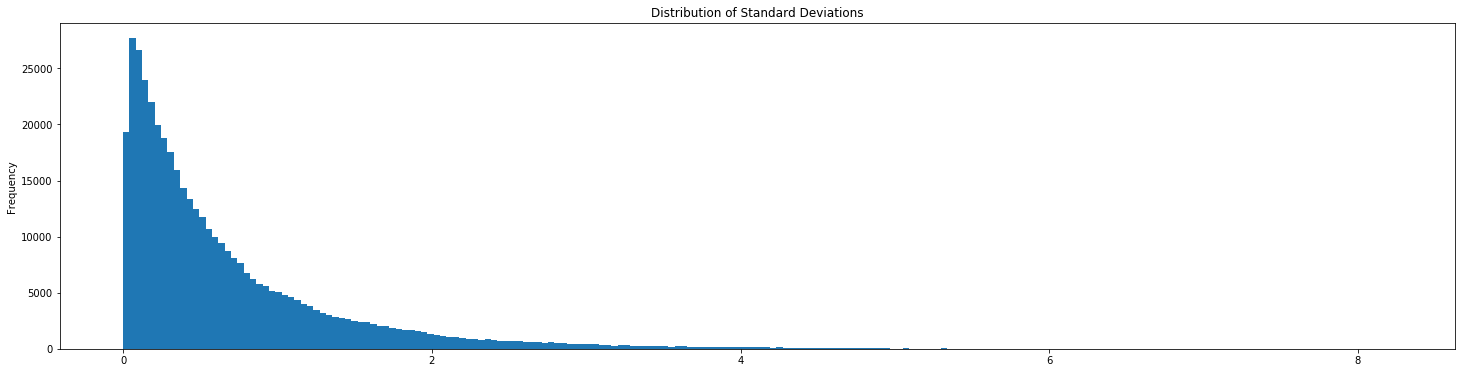

In [105]:
import pandas as pd
#Make copies of deviations to avoid manipulating true data
flat_deviations = deviations.flatten()
print("Max STD: ",deviations.max())
df = pd.Series(flat_deviations)
df.plot(kind='hist', figsize = (25, 6), bins=200, title = "Distribution of Standard Deviations")

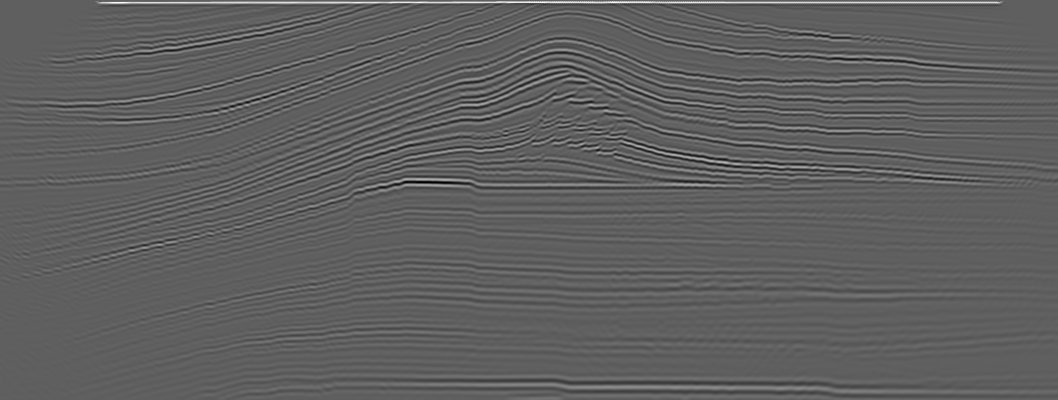

In [93]:
SAMPLE_REAL = "Desktop/BP HPC/small_dataset/small_dataset/img_1.stack.segy"
sample_arr = np.zeros((1058, 400))
with open(SAMPLE_REAL, 'rb') as segy_in_file:
    segy_reader = create_reader(segy_in_file, endian='>')
    for trace_index in segy_reader.trace_indexes():
        data = segy_reader.trace_samples(trace_index)
        for i in range(len(data)):
            sample_arr[trace_index, i] = data[i] #Collecting data for sample_arr


sample_arr = sample_arr.transpose() #Reformat 
min_arr = sample_arr.min()
max_arr = sample_arr.max()
sample_arr = (sample_arr - min_arr) / (max_arr - min_arr) #Normalizes all values to 0 - 1
sample_arr = sample_arr * 255  #Multiply everything to RGB Scale

im = Image.fromarray(sample_arr)
im = im.convert('RGB')
im.save("Realization_Map.jpeg")
im

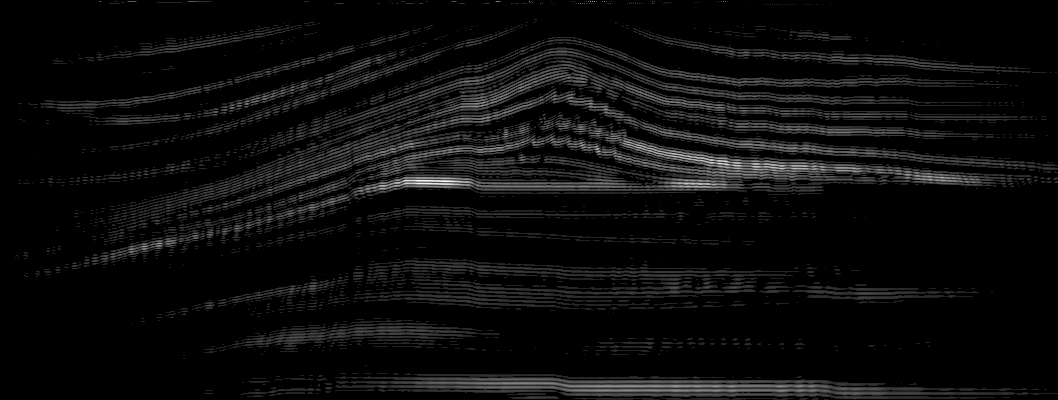

In [106]:
#We are going to set all values under threshold to 0, and plot the image
#Then, we are going to layer it on top of the random realization, see how that looks
THRESHOLD = 1.0 #If STD > THRESHOLD plot

deviations_copy = deviations.copy()
for i in range(len(deviations)):
    for j in range(len(deviations[0])):
        if deviations_copy[i][j] < THRESHOLD:
            deviations_copy[i][j] = 0

#Check distribution after pruning
#flat_deviations = deviations_copy.flatten()
#df = pd.Series(flat_deviations)
#df.plot(kind='hist', figsize = (25, 6), bins=200)


deviations_copy = deviations_copy.transpose()
min_arr = deviations_copy.min()
max_arr = deviations_copy.max()
deviations_copy = (deviations_copy - min_arr) / (max_arr - min_arr)
deviations_copy = deviations_copy * 255 #We are interested in all points that are not black
im2 = Image.fromarray(deviations_copy)
im2 = im2.convert('RGB')
im2.save("STD_Map.jpeg")
im2



In [112]:
#!{sys.executable} -m pip install image
#!{sys.executable} -m pip install Pillow
from PIL import Image

overlay = Image.open(r"C:\Users\19174\Downloads\STD_Tinted_RED.jpg")
background = Image.open(r"C:\Users\19174\Realization_Map.jpeg")

background = background.convert("RGBA")
overlay = overlay.convert("RGBA")

new_img = Image.blend(background, overlay, 0.5)
new_img.show()
new_img.save("new.png","PNG")

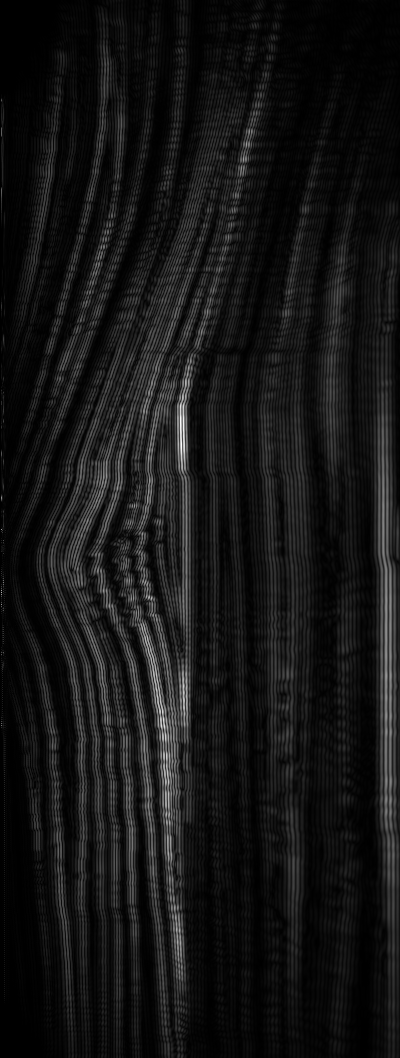

In [27]:
"""
Render the loaded realization by transposing it (so that the image is oriented intuitively) and normalizing.
"""

deviations = deviations.transpose()
min_arr = deviations.min()
max_arr = deviations.max()
deviations = (deviations - min_arr) / (max_arr - min_arr)
deviations = deviations * 255

im = Image.fromarray(deviations)
im = im.convert('RGB')
im

TypeError: array() missing required argument 'object' (pos 1)

In [19]:
"""
The provided files ending with a .gather.segy suffix store offset pair gathers generated
using some plausible (but not perfect) velocity model. Each offset pair gather file corresponds
with a single realization.

These gather files are 3D, with 39 offset pairs in the survey. The z and x dimensions are the
same as the realizations, with an added dimension indicating the offset pair. This information
can be seen in the SEGY header displayed below.
"""
print_segy_info('Desktop/BP HPC/small_dataset/small_dataset/img_3.gather.segy')

Filename:              Desktop/BP HPC/small_dataset/small_dataset/img_3.gather.segy
SEG Y revision:        SegYRevision.REVISION_0
Number of traces:      41262
Data format:           IBM 32 bit float
Dimensionality:        0

=== BEGIN TEXTUAL REEL HEADER ===
C01  BP syntheitc Date: 05/20/2019                                              
C02  image gather scenario with the following dimension                         
C03 axis  :         z    offset         x         y                             
C04 size  :       400        39      1058         1                             
C05 origin:   0.00000   0.00000   0.00000   0.00000                             
C06 delta :  10.00000  80.00000  10.00000  10.00000                             
=== END TEXTUAL REEL HEADER ===


In [15]:
"""
Load gathers into a 3D numpy array with dimensions (x, offsets, z).
"""
arr = np.zeros((1058, 39, 400))
with open('Desktop/BP HPC/small_dataset/small_dataset/img_3.gather.segy', 'rb') as segy_in_file:
    segy_reader = create_reader(segy_in_file, endian='>')
    
    count = 0
    for trace_index in segy_reader.trace_indexes():
        data = segy_reader.trace_samples(trace_index)
        for i in range(len(data)):
            arr[int(trace_index / 39), trace_index % 39, i] = data[i]

In [26]:
arr.min(), arr.max()

(-26.029754638671875, 41.17366027832031)

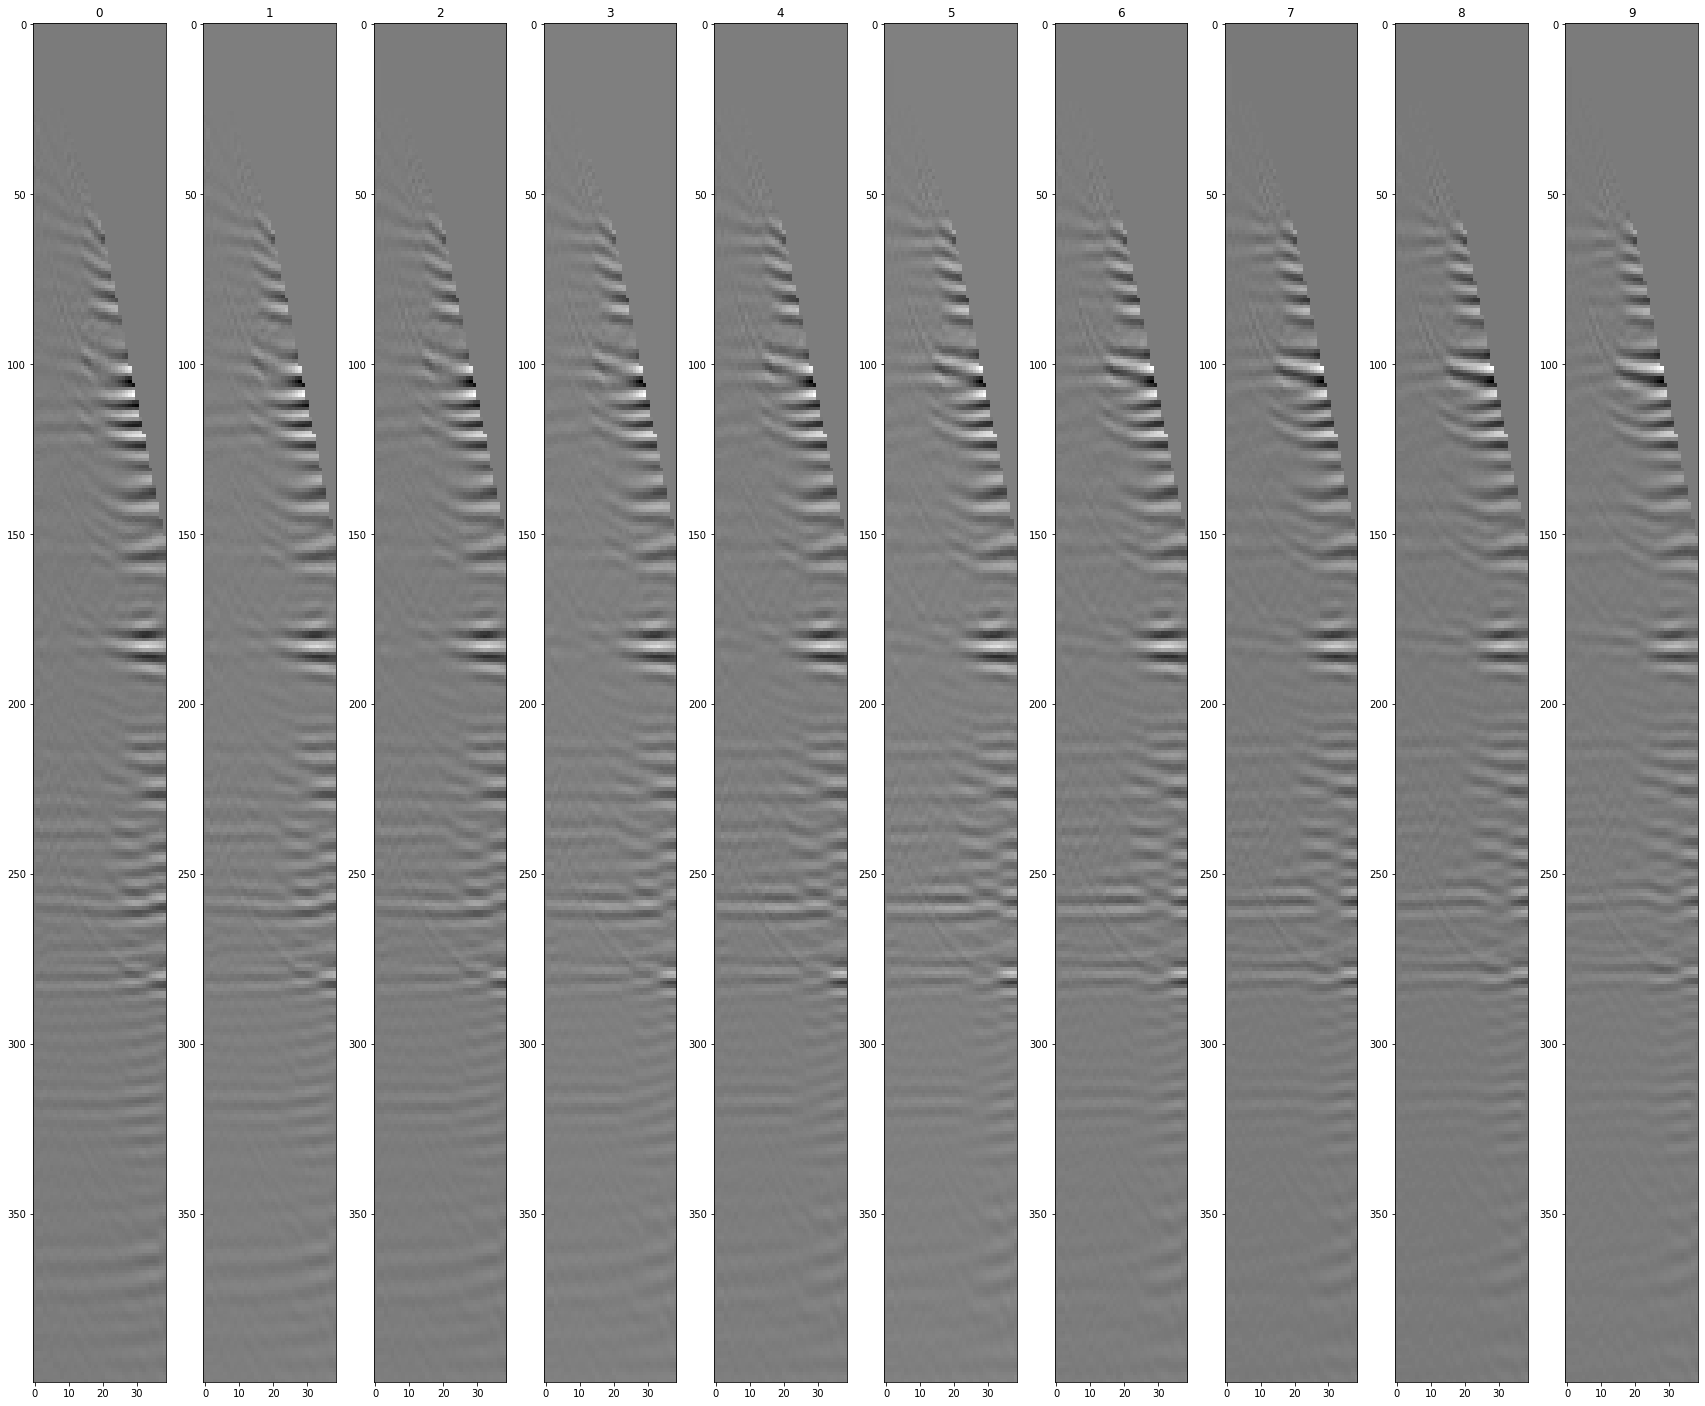

In [17]:
"""
Render the loaded gathers.
"""

nrows = 1
ncols = 10
f, axarr = matplotlib.pyplot.subplots(nrows, ncols, figsize = (30, 25))

for c in range(ncols):
    # Pull out all offset pairs for a given x
    sub_arr = arr[c, :, :]
    sub_arr = sub_arr.transpose()
    min_arr = sub_arr.min()
    max_arr = sub_arr.max()
    sub_arr = (sub_arr - min_arr) / (max_arr - min_arr)
    sub_arr = sub_arr * 255
    
    axarr[c].imshow(sub_arr, cmap = 'gray')
    
    title = str(c)
    axarr[c].set_title(title.strip())